In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 4s 10ms/step - loss: 0.6402 - accuracy: 0.8110 - val_loss: 0.2920 - val_accuracy: 0.9100
Epoch 2/2
375/375 [==============================] - 4s 10ms/step - loss: 0.2500 - accuracy: 0.9220 - val_loss: 0.2143 - val_accuracy: 0.9330
Epoch 1/2
375/375 [==============================] - 4s 10ms/step - loss: 0.2917 - accuracy: 0.9151 - val_loss: 0.1602 - val_accuracy: 0.9548
Epoch 2/2
375/375 [==============================] - 4s 10ms/step - loss: 0.1204 - accuracy: 0.9650 - val_loss: 0.1148 - val_accuracy: 0.9670


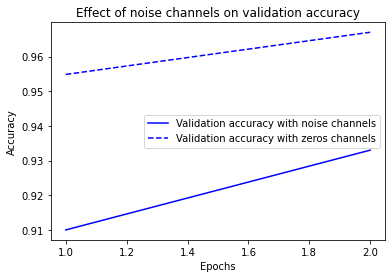

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 2.3173 - accuracy: 0.1043 - val_loss: 2.3065 - val_accuracy: 0.1064
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 2.2997 - accuracy: 0.1165 - val_loss: 2.3086 - val_accuracy: 0.1082


In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 700.6533 - accuracy: 0.3810 - val_loss: 2.2829 - val_accuracy: 0.2822
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 5.4602 - accuracy: 0.2533 - val_loss: 2.4291 - val_accuracy: 0.2848


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.3791 - accuracy: 0.9102 - val_loss: 0.1890 - val_accuracy: 0.9483
Epoch 2/2
375/375 [==============================] - 2s 7ms/step - loss: 0.1430 - accuracy: 0.9635 - val_loss: 0.1456 - val_accuracy: 0.9661


In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.8277 - val_loss: 0.3594 - val_accuracy: 0.9042
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.9034 - val_loss: 0.3077 - val_accuracy: 0.9160


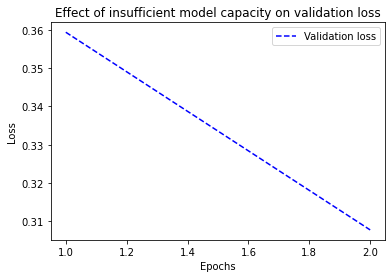

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1,3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.3555 - accuracy: 0.8984 - val_loss: 0.1743 - val_accuracy: 0.9497
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.1535 - accuracy: 0.9536 - val_loss: 0.1242 - val_accuracy: 0.9628


In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 31ms/step - loss: 0.5037 - accuracy: 0.8028 - val_loss: 0.3775 - val_accuracy: 0.8769
Epoch 2/2
30/30 [==============================] - 0s 16ms/step - loss: 0.3020 - accuracy: 0.9049 - val_loss: 0.2987 - val_accuracy: 0.8907


In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 31ms/step - loss: 0.6031 - accuracy: 0.7644 - val_loss: 0.5252 - val_accuracy: 0.8537
Epoch 2/2
30/30 [==============================] - 0s 14ms/step - loss: 0.4592 - accuracy: 0.8853 - val_loss: 0.4336 - val_accuracy: 0.8599


In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 5s 123ms/step - loss: 0.5421 - accuracy: 0.7572 - val_loss: 0.3539 - val_accuracy: 0.8559
Epoch 2/2
30/30 [==============================] - 2s 77ms/step - loss: 0.2569 - accuracy: 0.8961 - val_loss: 0.3077 - val_accuracy: 0.8773


In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 33ms/step - loss: 0.6166 - accuracy: 0.7780 - val_loss: 0.5142 - val_accuracy: 0.8316
Epoch 2/2
30/30 [==============================] - 0s 14ms/step - loss: 0.4340 - accuracy: 0.8886 - val_loss: 0.4103 - val_accuracy: 0.8849


In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 23ms/step - loss: 0.6476 - accuracy: 0.6169 - val_loss: 0.5482 - val_accuracy: 0.8471
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.5295 - accuracy: 0.7533 - val_loss: 0.4298 - val_accuracy: 0.8752
